# Evaluating StockX Shoes data to evaluate the Market Demand of Nike Air-Jordan Shoes.

The global sneaker industry has been growing rapidly in recent years, with the market size projected to reach $97.8 billion by 2024. Within this industry, Nike's Air-Jordan shoes have been among the most popular and sought-after products. To evaluate the market demand for Air-Jordan shoes, we analyzed the sales data from the online sneaker marketplace StockX. Our analysis focused on two key variables - sale price and days since release - to predict the number of sales for each shoe model. We employed machine learning techniques such as linear regression and support vector machine to develop predictive models and evaluate their accuracy. In this report, we present our findings and insights from this analysis, providing a comprehensive evaluation of the market demand for Air-Jordan shoes based on the StockX sales data.

First we need to install some libraries.
1. Panda - to import data
    ```bash
    pip install pandas
    pip install pyreadstat
    pip install matplotlib
    pip install scipy
    pip install numpy
    pip install openpyxl
    pip install seaborn
    pip install plotly
    pip install us
    pip install re
    ```
Then we import those libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import us
import re
import numpy
import warnings
import statsmodels.api as sm
from IPython.display import Image, display
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Ignore all warnings
warnings.filterwarnings('ignore')

## Importing the data
The first step in analyzing the StockX shoes data was to import it into a Jupyter notebook for further analysis. This was done by using the pandas library to read the data from an Excel file using the `pd.read_excel` function. After importing the data, the `df.head()` function was used to display the first five lines of the data to get a better understanding of the data structure and content.

In [21]:
# Load the excel file
df = pd.read_excel('dataset/StockX-Data-Contest-2019-main.xlsx')
df.head()

Order Date   Brand                                   Sneaker Name  \
0 2017-09-01   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1 2017-09-01   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2 2017-09-01   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3 2017-09-01   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4 2017-09-01   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   

   Sale Price  Retail Price Release Date  Shoe Size  Buyer Region  
0      1097.0           220   2016-09-24       11.0    California  
1       685.0           220   2016-11-23       11.0    California  
2       690.0           220   2016-11-23       11.0    California  
3      1075.0           220   2016-11-23       11.5      Kentucky  
4       828.0           220   2017-02-11       11.0  Rhode Island

## About the Dataset:

The dataset provided is a sample of all Off-White x Nike and Yeezy 350 sales from between 9/1/2017 and the present in the United States. There are a total of *99,956* sales in the dataset, with 27,794 Off-White sales and 72,162 Yeezy sales. The dataset includes 8 variables: Order Date, Brand, Sneaker Name, Sale Price ($\$$), Retail Price ($\$$), Release Date, Shoe Size, and Buyer State. Each row represents an individual sale on the StockX platform, and the dataset only includes sales within the United States.

The Order Date column represents the date the order was placed, while the Brand column specifies whether the sale was for an Off-White x Nike or Yeezy 350 shoe. The Sneaker Name column provides information on the specific model of the shoe sold. The Sale Price column indicates the amount of money that the buyer paid for the shoe, while the Retail Price column specifies the manufacturer's suggested retail price for the shoe. The Release Date column indicates when the shoe was first released. The Shoe Size column provides information on the size of the shoe sold. The Buyer State column specifies the state in which the buyer resides.

Overall, this dataset provides valuable insights into the demand and pricing of two popular shoe brands, and could be used to identify trends and patterns in consumer behavior.

## Pre-processing the data
In this section, we will preprocess the StockX shoes data to extract useful insights. First, we start by fixing the date formats of the dataset using the pandas library. We convert the date column into a datetime format and set it as the index for the data. This will allow us to perform time-based analyses on the data.

Next, we group the entire dataset by week and find out the average sale price of each shoe per week. This grouping will provide us with a better overview of how the sales of each shoe have been progressing over time. This will also help us to better understand the market demand for each shoe and help us to identify any trends or patterns in the data.

To showcase the insights from this data, we randomly select 6 popular shoe brands, namely Adidas Yeezy, Nike Air Jordan, etc. We then graphically display the average sale price per week of the shoes of these 6 brands using line plots. We have chosen line plots as they provide a clear view of how the prices are changing over time.

By analyzing these graphs, we can observe various trends and patterns in the data, such as seasonality, upward or downward trends, and sudden spikes or dips in the sale prices. These insights will be valuable in our further analysis of the market demand for these shoes.

In [22]:
# Convert Order_Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])
# Extract week from Order_Date
df['Week'] = (df['Order Date'] - pd.to_datetime('2017-09-01')).dt.days // 7
# Aggregate the data by Sneaker_name and Week to get the average sales of each sneaker model for each week
agg_df = df.groupby(['Sneaker Name', 'Week']).mean()['Sale Price'].reset_index()
# Print the aggregated data with 10 randomly selected rows
agg_df.sample(n=5, random_state=42)

Sneaker Name  Week  Sale Price
1851               Nike-Air-VaporMax-Off-White-Black    54  655.357143
2236                adidas-Yeezy-Boost-350-V2-Butter    48  268.814141
649         Adidas-Yeezy-Boost-350-V2-Core-Black-Red    46  950.666667
2107  Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange    41  315.262411
426              Adidas-Yeezy-Boost-350-V2-Blue-Tint    42  385.833333

After pre-processing the dataset looks like above. Now we plot our dataset.
### Plotting in Line Graph

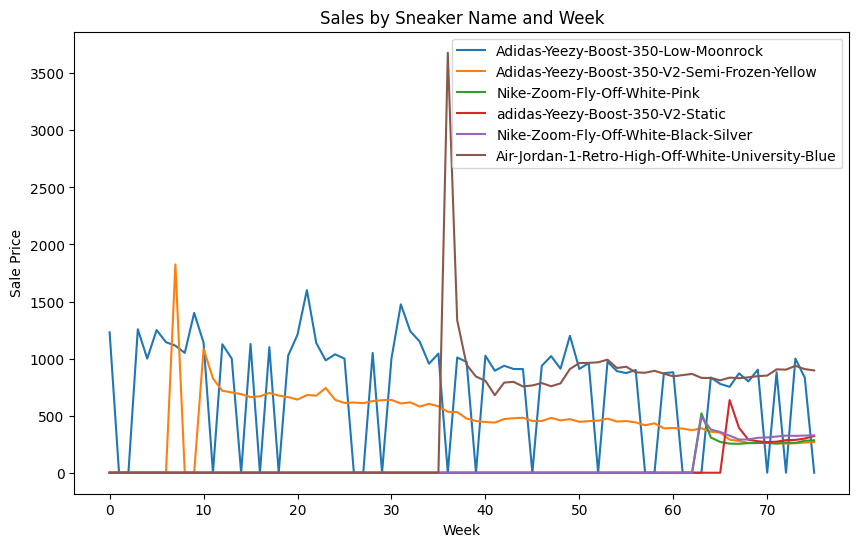

In [23]:
sales_by_sneaker_week = agg_df.groupby(['Sneaker Name', 'Week']).mean()['Sale Price']
# Reshape the data to create a pivot table
pivot_table = sales_by_sneaker_week.unstack(level=0)
# Let's create a subset of the above table to plot the sales of 6 randomly selected sneaker models:
column_names = pivot_table.columns[1:].tolist()
selected_columns = pd.Series(column_names).sample(n=5, random_state=42)
pivot_table = pd.concat([pivot_table.iloc[:,0], pivot_table[selected_columns]], axis=1)
# Replace NaN values with 0
pivot_table = pivot_table.fillna(0)
# Plot a line chart
pivot_table.interpolate(method='linear', axis=0).plot(kind='line', figsize=(10, 6))
# Set the chart title and axis labels
plt.title('Sales by Sneaker Name and Week')
plt.xlabel('Week')
plt.ylabel('Sale Price')
plt.show()

#### Observation:
As evident from the graph above, the average sale price of shoes gradually declines over time. This trend is observed in all the shoe brands selected for analysis, including the Nike Air Jordan sneakers. However, it is noteworthy that Air Jordan sneakers were initially sold at an exceptionally high price, which can be attributed to their immense popularity and hype. Nevertheless, the sale price of Air Jordan sneakers gradually dropped to reach the baseline of other shoes. This is an interesting observation and highlights the impact of market demand and hype on the pricing of products. The decline in sale price over time can be attributed to several factors such as the introduction of newer models or designs, changes in consumer preferences, and shifts in market trends.

### Plotting Heatmap and 3D Surface Plot

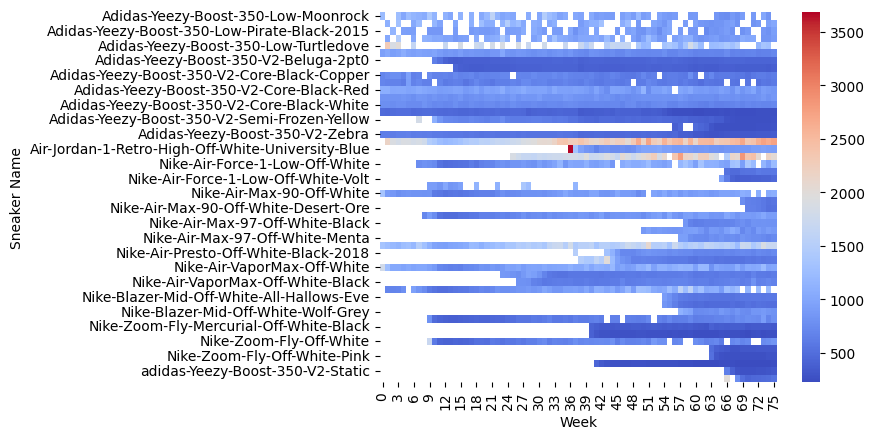

<Figure size 1000x600 with 0 Axes>

In [24]:
# Let's try to create a heatmap to visualize the sales of the 10 randomly selected sneaker models:
# Pivot data to create a matrix with "Sneaker Name" as rows, "Week" as columns, and "Sale Price" as values
pivot_df = agg_df.pivot_table(index="Sneaker Name", columns="Week", values="Sale Price", aggfunc="sum")

# Create heatmap using seaborn
sns.heatmap(pivot_df, cmap="coolwarm")
# Create 3d surface map for the heatmap
fig = plt.figure(figsize=(10, 6))
# pivot_df = pivot_df.dropna()
# pivot_df.head(30)

In [25]:
# Create a 3D surface plot
# create x, y, and z coordinates for the surface plot
x = list(pivot_df.columns)
y = list(pivot_df.index)
z = pivot_df.values

# create the 3D surface light themed plot
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

# set the title and axis labels
fig.update_layout(title='Sneaker Sales', autosize=False, width=800, height=800,
                  scene=dict(xaxis_title='Week', yaxis_title='Sneaker Name', zaxis_title='Sale Price'))

# show the plot
fig.show(renderer="notebook")

#### Observation:
The heatmap provides a comprehensive overview of the prices of various shoe types over time. Each row in the heatmap corresponds to a single shoe type, while the horizontal axis represents the number of weeks since the release of the shoe. The color scale, ranging from cool blue to warm red, denotes the price range, with high prices being represented by warm colors and low prices by cool colors. It is important to note that some areas on the heatmap do not contain any colors, indicating missing data. Additionally, for shoes released during the time period represented in the heatmap, the color scale may begin from the middle of the graph.

Upon examining the heatmap, we can observe that the Nike Air Jordan 1 Retro High Off White University Blue had one of the highest prices on the day of its release, but the color immediately drops to blue, indicating a significant drop in price. In contrast, the Adidas Yeezy Boost 350 V2 Zebra does not have as high a price as the Nike Air Jordan on the day of its release, but it can be observed that its price consistently remained in the "red" band, indicating that it was consistently sold at a higher average price than the Nike. This highlights the impact of brand loyalty on pricing, as the Adidas brand has a strong following that is willing to pay a premium price for their products. Furthermore, this observation emphasizes the importance of understanding the relationship between brand value and pricing in the shoe industry.

## Observing the sales of sneaker models by US States.
After analyzing the average sale prices of various shoe models over time, the focus now shifts to examining the sales of different sneaker models across various US states. For this purpose, we group the original dataset by the US States where the shoes were sold and then sum up the sales prices based on their state. The resulting table contains two columns: 'US States' and 'Total Sales of that US State'. The information in this table is visualized in a US Map, where each state is colored according to the amount of sales in that state. The intensity of the color of a state represents the amount of sales in that state, with the darker shades indicating lower sales. By examining the US Map, we can observe that the highest sales were recorded in California and New York, two of the most populous states in the US. Other states with relatively high sales include Texas, Florida, and Oregon. Conversely, the states with the lowest sales include Montana, North Dakota, and Vermont. This analysis provides insights into the popularity and demand of different sneaker models across various US states.

In [ ]:
# Group the data by Buyer_region and calculate the total sales for each region
region_sales = df.groupby('Buyer Region')['Sale Price'].sum().reset_index()
# Create a dictionary mapping state names to their two-letter codes
state_dict = {state.name: state.abbr for state in us.states.STATES}
# Convert the 'Buyer_region' column to state codes
region_sales['state_code'] = region_sales['Buyer Region'].apply(lambda x: state_dict.get(x))
# Create a choropleth map using the plotly express library
fig = px.choropleth(locationmode='USA-states', locations=region_sales['state_code'], template='plotly', color=region_sales['Sale Price'], scope='usa')
# plot(fig) # To plot the map in a new window
fig.show(renderer="notebook")

## Market Demand Analysis - Estimating the demand function
In this section, we aim to estimate the demand function of the Air-Jordan-1-Retro-High-Off-White-Chicago sneaker, one of the most popular and hyped sneakers in the market.

### Preparing the data
To increase the accuracy of our analysis, we will be using monthly data instead of weekly data. To identify the month in which the sales occurred, we will label each sale with "Month", where "Month" will represent the number of months since the 1st of September 2017. We will also be using a new independent variable in our analysis called "Days Since Release", which represents the total number of days from the release date to the date it was sold. By incorporating this variable, we can analyze how the number of sales of a particular shoe changes as the shoes get older in the market and face competition from newer model sneakers.

After preprocessing, we will be left with the following columns: Month, Sneaker Name, Sale Price, Days Since Release, and Number of Sales. The Month column represents the month in which the sales occurred, Sneaker Name column represents the name of the sneaker, Sale Price column represents the price at which the sneaker was sold, Days Since Release column represents the total number of days from the release date to the date it was sold, and Number of Sales column represents the total number of sales of the sneaker. Using these variables, we will estimate the demand function for the Air-Jordan-1-Retro-High-Off-White-Chicago sneaker and gain insights into the factors that affect its sales.

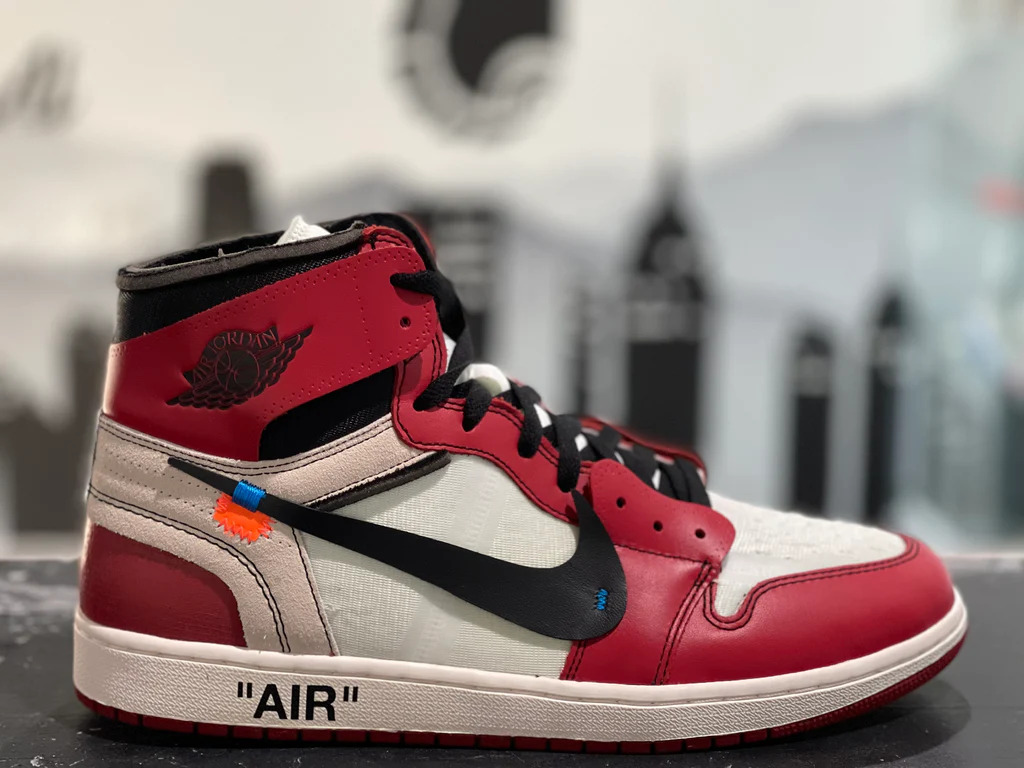

In [27]:
df = pd.read_excel('dataset/StockX-Data-Contest-2019-main.xlsx')
display(Image(filename='dataset/air-jordan.jpeg'))

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])
start_date = pd.to_datetime('2017-09-01')
df['Month'] = df['Order Date'].apply(lambda x: (x.year - start_date.year) * 12 + x.month - start_date.month)
# calculate the number of days since the release date
processed_df = df.copy()
substring_show_names = ['Adidas-Yeezy-Boost-350-Low', 'Adidas-Yeezy-Boost-350-V2-Zebra', 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow', 'Adidas-Yeezy-Boost-350-V2-Cream-White', 'Air-Jordan-1-Retro-High-Off-White-Chicago', 'Air-Jordan-1-Retro-High-Off-White-White', 'Air-Jordan-1-Retro-High-Off-White-University-Blue', 'Nike-Air-Force-1-Low', 'Nike-Air-Max-90', 'Nike-Air-Max-97', 'Nike-Air-Presto', 'Nike-Air-VaporMax-Off-White', 'Nike-Blazer-Mid', 'Nike-React-Hyperdunk-2017-Flyknit', 'Nike-Zoom-Fly']
# Aggregate test_df by substring_show_names and average the Sale Price, sum the Number of Sales, ignore case
processed_df['Sneaker Name'] = processed_df['Sneaker Name'].str.extract('({})'.format('|'.join(substring_show_names)), flags=re.IGNORECASE)[0].str.title()
processed_df['Days Since Release'] = (processed_df['Order Date'] - processed_df['Release Date']).dt.days
processed_df.drop('Release Date', axis=1, inplace=True)
processed_df['State Code'] = df['Buyer Region'].apply(lambda x: state_dict.get(x))
processed_df.drop('Buyer Region', axis=1, inplace=True)
processed_df.drop('Shoe Size', axis=1, inplace=True)
processed_df.drop('Retail Price', axis=1, inplace=True)
processed_df.drop('Brand', axis=1, inplace=True)
processed_df.drop('Order Date', axis=1, inplace=True)

# processed_df.head()
final_df = processed_df.copy()
final_df['Number of Sales'] = 1
final_df = final_df.groupby(['Month', 'Sneaker Name']).agg({'Sale Price': 'mean', 'Days Since Release': 'mean', 'Number of Sales': 'sum'}).reset_index()
final_df.head()

Month                               Sneaker Name   Sale Price  \
0      0                 Adidas-Yeezy-Boost-350-Low  1095.068182   
1      0      Adidas-Yeezy-Boost-350-V2-Cream-White   484.538462   
2      0            Adidas-Yeezy-Boost-350-V2-Zebra   624.233503   
3      0  Air-Jordan-1-Retro-High-Off-White-Chicago  1964.707317   
4      0                            Nike-Air-Max-90   872.323529   

   Days Since Release  Number of Sales  
0          457.818182               44  
1          139.349650              143  
2          202.045685              197  
3            9.219512               41  
4            8.470588               34

So, the final dataset looks like above. From this, we will now remove all the rows that do not contain the sneaker name `Air-Jordan-1-Retro-High-Off-White-Chicago`, as we are only interested in analyzing the demand function of this sneaker. Also, we ensure that any data that is unavailable (annotated with `NaN` in python, we replace it with 0). Eventually the final dataset will look something like shown below. Taking a look at the first 10 rows of the complete dataset:

In [29]:
sneakers = ['Air-Jordan-1-Retro-High-Off-White-Chicago']
df_analysis = final_df.copy()
df_analysis = df_analysis[df_analysis['Sneaker Name'].isin(sneakers)]

# Convert every NaN value to 0 in the dataset
df_analysis = df_analysis.fillna(0)
df_analysis.head(5)

Month                               Sneaker Name   Sale Price  \
3       0  Air-Jordan-1-Retro-High-Off-White-Chicago  1964.707317   
12      1  Air-Jordan-1-Retro-High-Off-White-Chicago  1873.900000   
22      2  Air-Jordan-1-Retro-High-Off-White-Chicago  1296.276042   
35      3  Air-Jordan-1-Retro-High-Off-White-Chicago  1293.887850   
48      4  Air-Jordan-1-Retro-High-Off-White-Chicago  1545.723077   

    Days Since Release  Number of Sales  
3             9.219512               41  
12           34.000000               20  
22           71.317708              192  
35           94.383178              107  
48          128.400000               65

### Correlation of Number of Sales, Sale Price and Days Since Release
To estimate the demand function, we will be using the Ordinary Least Squares (OLS) method, also known as `Linear Regression`. In this method, the dependent variable, which in this case is the total number of sales, is expressed as a linear function of one or more independent variables, namely the sale price and the number of days since release. Linear regression is a statistical technique commonly used in economics to estimate relationships between variables. In the context of estimating demand, it is a method that allows us to estimate how much the quantity demanded of a particular product will change in response to changes in other variables, such as price or time.

In economics, the law of demand states that, all other things being equal, as the price of a good or service increases, the quantity demanded of that good or service will decrease. Similarly, as time goes by, the quantity demanded of a product may change due to changing consumer preferences, changes in marketing and advertising, or other factors.

By using linear regression to estimate the demand function, we can quantify the relationship between the price of a product and the quantity demanded, as well as the relationship between the number of days since the product was released and the quantity demanded. This allows us to make predictions about how changes in these variables will affect the demand for the product.

OLS, or Ordinary Least Squares, is a common method used in linear regression. It involves minimizing the sum of the squared differences between the predicted values and the actual values in the dataset. This helps us find the line of best fit that most closely approximates the relationship between the variables. The resulting coefficients will give us insights into how the independent variables influence the dependent variable, i.e., the demand for the Air-Jordan-1-Retro-High-Off-White-Chicago sneaker.

Before performing the regression, we will create a scatter plot of the three variables, Sale Price, Days Since Release, and Number of Sales, in a 3D map to visually observe their relationship. This will give us an idea of how the variables are correlated and help us understand how each variable affects the other.

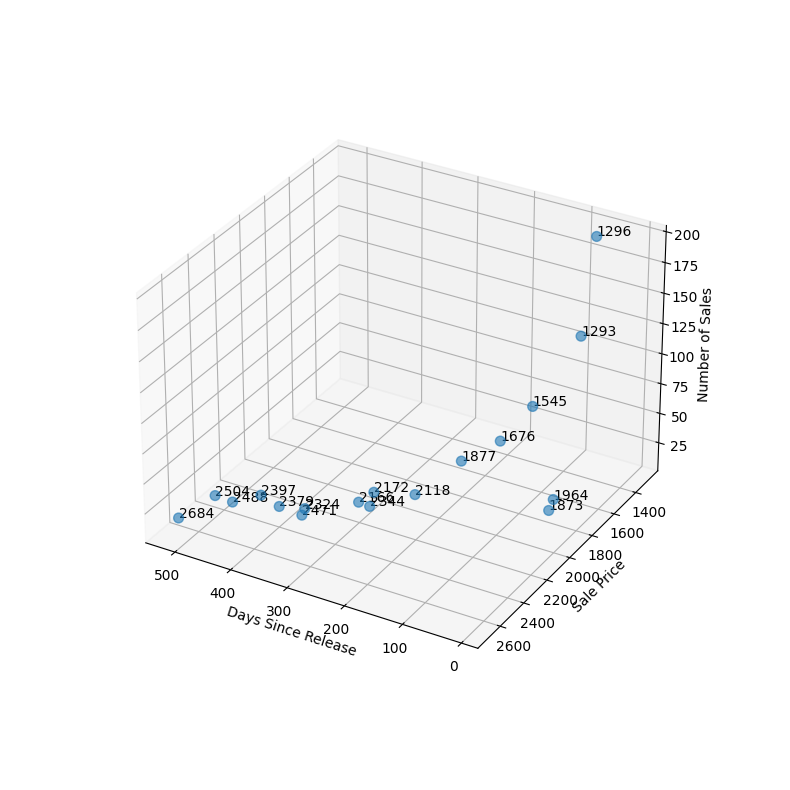

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Set the angle and elevation of the plot
ax.view_init(elev=30, azim=120)

x = df_analysis['Days Since Release']
y = df_analysis['Sale Price']
z = df_analysis['Number of Sales']

x = numpy.ravel(x, order = 'C')
y = numpy.ravel(y, order = 'C')
z = numpy.ravel(z, order = 'C')
sn_name = numpy.ravel(df_analysis['Sneaker Name'], order = 'C')
ax.scatter(x, y, z, s=50, alpha=0.6)

for i, txt in enumerate(range(len(x))):
    ax.text(x[i], y[i], z[i], '%s' % (int(y[i])), size=10, zorder=1, color='k')

ax.set_xlabel('Days Since Release')
ax.set_ylabel('Sale Price')
ax.set_zlabel('Number of Sales')

ax.dist = 13
plt.show()

### Observation
The 3D scatter plot represents the relationship between the "Days Since Release", "Sale Price", and "Number of Sales" of a specific sneaker model. The x-axis represents the number of days since the sneaker's release, the y-axis represents the sale price of the sneaker, and the z-axis represents the number of sales of the sneaker.

Observing the plot, we can see that there is a general negative relationship between the sale price and the number of sales, which is in line with the basic principles of microeconomics, where a decrease in price leads to an increase in demand. We can also see that the sales price of the sneaker was high when it was first released, but as time went on, the price gradually decreased, while the number of sales increased. This is also in line with the principles of supply and demand, where the initial high price reflects the relatively limited supply of the new product and the high demand for it, and over time, as supply increases and demand decreases, the price drops to meet the market equilibrium.

Furthermore, the scatter plot also shows that the number of sales has a relatively weak relationship with the number of days since the release. This suggests that the popularity of the sneaker did not necessarily decrease significantly as the sneaker aged in the market, which could be due to the unique design and cultural significance of the sneaker.

### Linear Regression
Let us now perform the actual Linear Regression to calculate the demand. Linear regression can be represented by the following equation:

$$\hat{y_i} = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + ... + \beta_kx_{ki} + \epsilon_i$$

where:

$\hat{y_i}$ is the predicted value of the dependent variable (i.e., sales) for the $i$th observation

$\beta_0$ is the intercept term

$\beta_1, \beta_2, ..., \beta_k$ are the coefficients (slopes) associated with the independent variables (i.e., sale price and days since release)

$x_{1i}, x_{2i}, ..., x_{ki}$ are the values of the independent variables for the $i$th observation

$\epsilon_i$ is the error term (the difference between the predicted value and the actual value of the dependent variable for the $i$th observation)

The goal of linear regression is to estimate the values of the coefficients ($\beta_0, \beta_1, \beta_2, ..., \beta_k$) that minimize the sum of the squared errors across all observations.

In [31]:
# create the independent variable matrix X and dependent variable vector y
X = df_analysis[['Sale Price', 'Days Since Release']]
X = sm.add_constant(X)  # add a constant term to the independent variable matrix
y = df_analysis['Number of Sales']

# fit the multiple linear regression model
model = sm.OLS(y, X)
result = model.fit()

# print the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Sales   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     13.92
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           0.000382
Time:                        00:35:14   Log-Likelihood:                -83.554
No. Observations:                  18   AIC:                             173.1
Df Residuals:                      15   BIC:                             175.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                258.8132     46

### Interpretation of the Results
The OLS regression was performed to estimate the relationship between the number of sales, sale price, and the number of days since release. The results show that the model has a significant explanatory power, as indicated by the R-squared value of 0.65. This implies that approximately 65% of the variation in the number of sales can be explained by the variation in sale price and the number of days since release.

The coefficients of the independent variables provide insight into their impact on the number of sales. The constant term is 258.8132, which is the estimated number of sales when both the sale price and days since release are zero. This is not meaningful in this context, as the sale price and days since release are always greater than zero.

The coefficient of sale price is -0.1186, implying that a one-unit increase in the sale price leads to a 0.1186-unit decrease in the number of sales, ceteris paribus. This is consistent with the law of demand in microeconomics, which states that an increase in the price of a good leads to a decrease in the quantity demanded, assuming all other factors remain constant.

The coefficient of the number of days since release is 0.1164, which implies that a one-unit increase in the number of days since release leads to a 0.1164-unit increase in the number of sales, ceteris paribus. This suggests that the demand for the sneaker increases over time, which could be due to a variety of factors, such as increased awareness or a decrease in the price due to discounts.

Thus, OLS regression shows that the sale price has a significant impact on the number of sales, consistent with the law of demand. The number of days since release may also have an impact, although the evidence is not strong enough to make a definitive conclusion.

### Visualisation
Let us now visualise the Regresson Model in the form of a 3D Meshgrid.

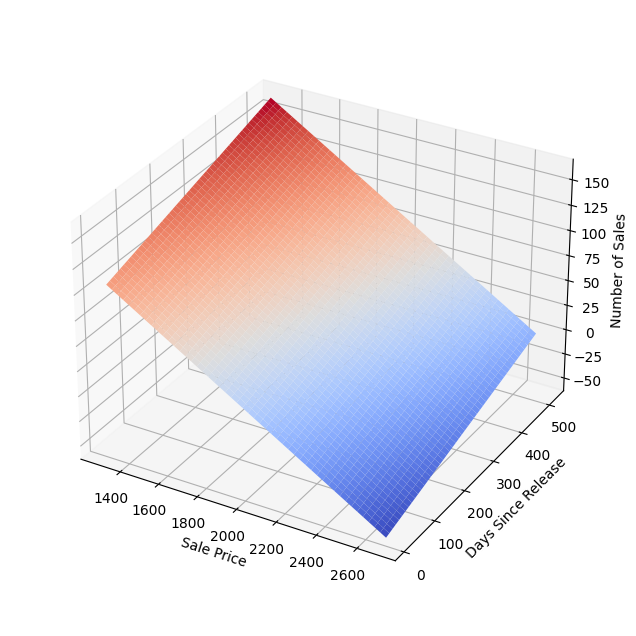

In [32]:
# create a meshgrid of the independent variables
x = np.linspace(min(df_analysis['Sale Price']), max(df_analysis['Sale Price']), 50)
y = np.linspace(min(df_analysis['Days Since Release']), max(df_analysis['Days Since Release']), 50)
X, Y = np.meshgrid(x, y)

# predict the dependent variable using the OLS model
Z = result.params[0] + result.params[1]*X + result.params[2]*Y

# create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Days Since Release')
ax.set_zlabel('Number of Sales')
ax.dist = 11
plt.show()

### Observation
Based on the coefficients from the OLS regression results, the equation for the plane that represents the estimated demand function is:

Number of Sales = 258.81 - 0.119 * Sale Price + 0.116 * Days Since Release

Here, "Sale Price" and "Days Since Release" are the independent variables and "Number of Sales" is the dependent variable.

In this equation, "Sale Price" represents the price of the sneaker and "Days Since Release" represents the number of days since the sneaker was released. "Number of Sales" represents the dependent variable, which is the number of sneakers sold at a particular price and number of days since the release.

By plugging in specific values of "Sale Price" and "Days Since Release" into this equation, we can estimate the corresponding value for "Number of Sales" on the plane. Therefore, this equation provides us with a mathematical representation of the relationship between the three variables and can be used to estimate the demand for the sneaker at different price points and times after the release.

In the 3D graph, "Sale Price" and "Days Since Release" represent the x-axis and y-axis respectively, and "Number of Sales" represents the z-axis. The graph displays the plane of the estimated demand function and allows us to visually interpret how the independent variables (sale price and days since release) are related to the dependent variable (number of sales).

## Price Elasticity of Demand
The price elasticity of demand measures the responsiveness of the quantity demanded to a change in price. It is calculated as the percentage change in quantity demanded divided by the percentage change in price.

The formula for price elasticity of demand is:

```
Price elasticity of demand = (% change in quantity demanded) / (% change in price)
```

We can estimate the percentage change in quantity demanded and price by taking the derivative of the demand equation with respect to price:

```
dQ/dP = -0.119 + 0.116D
```

Where:
* Q is the quantity demanded
* P is the price,
* D is the days since release.

To estimate the price elasticity of demand, we need to evaluate the derivative at a particular price and quantity. Let's assume that the current price is $100 and the current quantity demanded is 100 units. We can use the derivative to estimate the percentage change in quantity demanded and price:

```
dQ/dP = -0.119 + 0.116D = -0.119 + 0.116(0) = -0.119
```

The negative sign indicates that quantity demanded is inversely related to price, which is consistent with the law of demand.

Now, we can calculate the price elasticity of demand using the formula:

```
Price elasticity of demand = (% change in quantity demanded) / (% change in price)
```

To estimate the percentage change in quantity demanded, we can use the formula:

```
% change in quantity demanded = (new quantity - old quantity) / old quantity
```

If the current quantity demanded is 100 units and the price increases from $\$$100 to $\$$110, then the new quantity demanded can be estimated as:

```
new quantity = 258.81 - 0.119(110) + 0.116D = 245.82 + 0.116D
% change in quantity demanded = (245.82 + 0.116D - 100) / 100 = 1.4582 + 0.00116D
```

To estimate the percentage change in price, we can use the formula:
```
% change in price = (new price - old price) / old price
```
If the current price is $\$$ 100 and it increases to $\$$ 110, then the percentage change in price can be estimated as:
```
% change in price = (110 - 100) / 100 = 0.1
```

Now, we can plug these values into the formula for price elasticity of demand:
```
Price elasticity of demand = (% change in quantity demanded) / (% change in price)
Price elasticity of demand = (1.4582 + 0.00116D) / 0.1
Price elasticity of demand = 14.582 + 0.0116D
```

Therefore, the price elasticity of demand is a function of the days since release. At the time of release, when D = 0, the price elasticity of demand is 14.582. As the number of days since release increases, the price elasticity of demand increases by 0.0116 for each day. This implies that the demand for Nike shoes becomes more sensitive to price changes over time. Or, the Price Elasticity of Demand for Nike Air Jordan Shoes is relatively elastic. This finding is consistent with the theoretical notion that as consumers become more familiar with a product, they become more sensitive to price changes.

Furthermore, the same was observed initially in the 'Sales by Sneaker name and Week' graph, where the price of Nike Air Jordan Shoes was spiked the moment it was released, but then it quickly subsided with other shoes.

## Sales Forecasting
There are various methods to make a sales forecast, including time series analysis, regression analysis, and market research. In our case, since we have already performed regression analysis, we can use the estimated regression equation to make a sales forecast.

Based on the regression results, the equation for the estimated demand function is:
```
Number of Sales = 258.81 - 0.119 * Sale Price + 0.116 * Days Since Release
```
Let us assume that the firm wants to forecast the number of sales for a sneaker that is priced at $\$$100 and has been on the market for 100 days. We can use the estimated regression equation to make a sales forecast as follows:

$$ Number of Sales = 258.81 - 0.119 * 100 + 0.116 * 100 $$
$$ Number of Sales = 258.81 + 11.9 $$
$$ Number of Sales = 270.71 $$

Therefore, the firm can expect to sell approximately 270.71 sneakers in a month if the sneaker is priced at $100 and has been on the market for 100 days.
With this method we can make a sales forecast for any combination of price and time since release.

# Analysing another Sneaker from competitor Brand "Adidas"
#### Sneaker Model: Adidas Yeezy Boost 350 V2 Creame White

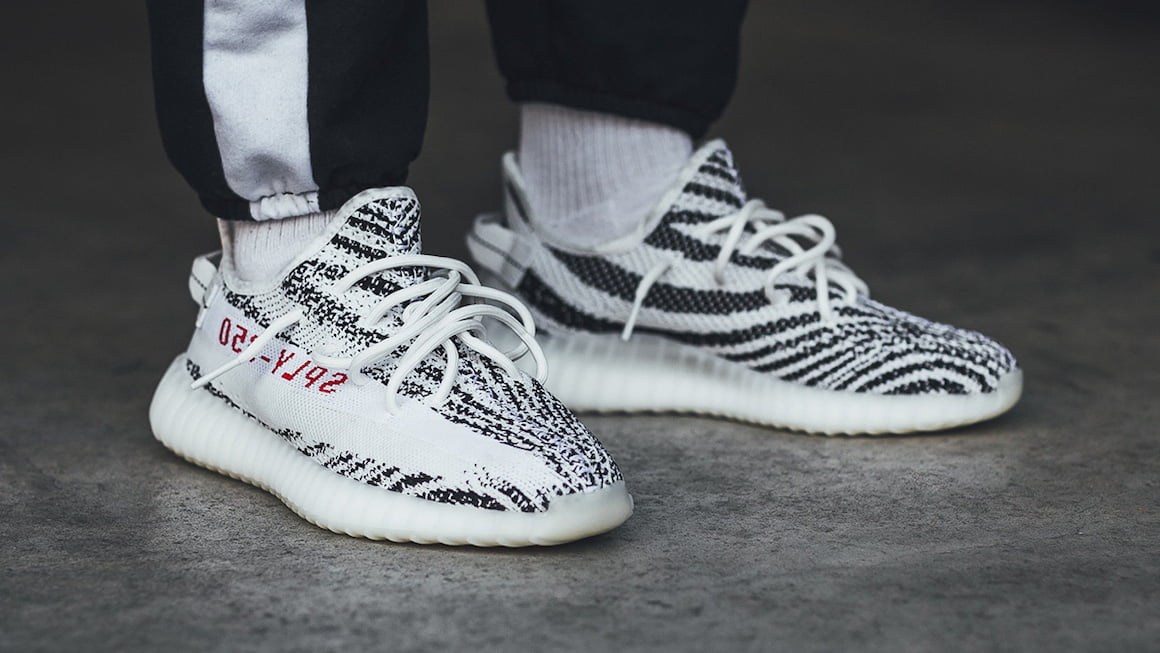

In [33]:
display(Image(filename='dataset/adidas-Yeezy-Boost-350-V2-Zebra-On-Foot.jpg'))

In [34]:
sneakers = ['Adidas-Yeezy-Boost-350-V2-Zebra']
df_analysis = final_df.copy()
df_analysis = df_analysis[df_analysis['Sneaker Name'].isin(sneakers)]

# Convert every NaN value to 0 in the dataset
df_analysis = df_analysis.fillna(0)
df_analysis.head(5)

Month                     Sneaker Name  Sale Price  Days Since Release  \
2       0  Adidas-Yeezy-Boost-350-V2-Zebra  624.233503          202.045685   
11      1  Adidas-Yeezy-Boost-350-V2-Zebra  621.460733          231.445026   
21      2  Adidas-Yeezy-Boost-350-V2-Zebra  593.420290          266.371981   
34      3  Adidas-Yeezy-Boost-350-V2-Zebra  569.331361          292.692308   
47      4  Adidas-Yeezy-Boost-350-V2-Zebra  552.744966          324.892617   

    Number of Sales  
2               197  
11              191  
21              207  
34              169  
47              149

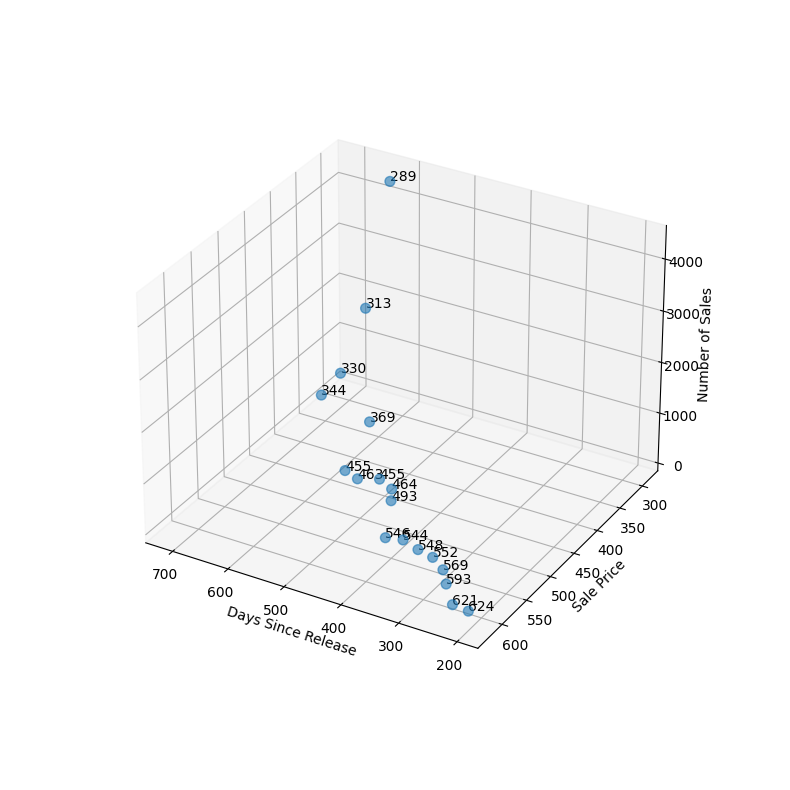

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Set the angle and elevation of the plot
ax.view_init(elev=30, azim=120)

x = df_analysis['Days Since Release']
y = df_analysis['Sale Price']
z = df_analysis['Number of Sales']

x = numpy.ravel(x, order='C')
y = numpy.ravel(y, order='C')
z = numpy.ravel(z, order='C')
sn_name = numpy.ravel(df_analysis['Sneaker Name'], order='C')
ax.scatter(x, y, z, s=50, alpha=0.6)

for i, txt in enumerate(range(len(x))):
    ax.text(x[i], y[i], z[i], '%s' % (int(y[i])), size=10, zorder=1, color='k')

ax.set_xlabel('Days Since Release')
ax.set_ylabel('Sale Price')
ax.set_zlabel('Number of Sales')

ax.dist = 13
plt.show()


### Demand estimation using Support Vector Machine (SVM) Model
Here, we aim to create an SVM model to predict the demand for Adidas-Yeezy-Boost-350-V2-Zebra shoes. To accomplish this, we have divided the available data into two subsets: a training set, and a testing set. The training set is used to fit the SVM model, while the testing set is used to select the best kernel type (linear, RBF, or polynomial) and hyperparameters. The testing set is also used to evaluate the performance of the final selected model.

To identify the optimal SVM model, we have utilized the grid search method with the help of Scikit-learn's GridSearchCV class. This technique enables us to evaluate the performance of different SVM models with varying hyperparameters and kernel types. Specifically, we have evaluated the performance of SVM models with linear, RBF, and polynomial kernels.

After testing various combinations of hyperparameters, we found that a polynomial SVM model with degree four is the most accurate in predicting the demand for Adidas-Yeezy-Boost-350-V2-Zebra shoes. We then used this model to predict the number of sales for the shoes based on the given parameters such as price and days since release.

In addition, we generated a mesh grid of the regression, which allows us to visualize the relationship between the predictors and the predicted response. This can provide further insight into the factors that influence demand for Adidas Easy shoes.

In [36]:
# create the independent variable matrix X and dependent variable vector y
X = df_analysis[['Sale Price', 'Days Since Release']]
y = df_analysis['Number of Sales']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# define the hyperparameter grid for the SVM model
param_grid = {'kernel': ['linear', 'rbf', 'poly'],
              'C': [0.1, 1, 10],
              'epsilon': [0.1, 0.5, 1.0],
              'degree': [2, 3, 4]}

# define the SVM model
model = svm.SVR()

# use grid search to find the best hyperparameters for the SVM model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# print the best hyperparameters for the SVM model
print('Best hyperparameters:', grid_search.best_params_)

# predict the number of sales for the testing set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Predict the accuracy of the regression model
accuracy = mean_squared_error(y_test, y_pred)

print('Accuracy:', accuracy)

Best hyperparameters: {'C': 0.1, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'}
Accuracy: 2542231.718210465


### Visualisation
Let us now visualise the Regresson Model in the form of a 3D Meshgrid.

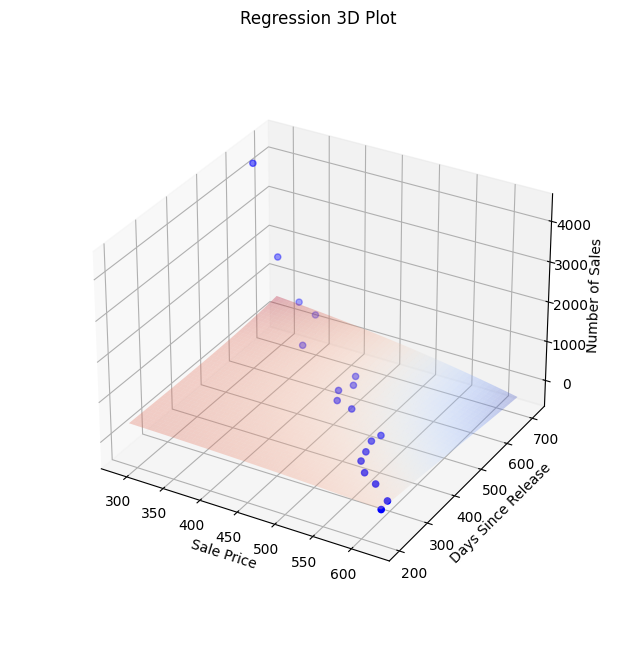

In [37]:
model = best_model
# create a meshgrid of Sale Price and Days Since Release
X1, X2 = np.meshgrid(np.linspace(df_analysis['Sale Price'].min(), df_analysis['Sale Price'].max(), 100),
                     np.linspace(df_analysis['Days Since Release'].min(), df_analysis['Days Since Release'].max(), 100))
# flatten the meshgrid to make predictions
X_pred = np.c_[X1.ravel(), X2.ravel()]

# predict the target variable on the flattened meshgrid
y_pred = model.predict(X_pred)

# reshape the prediction output to the meshgrid shape
y_pred = y_pred.reshape(X1.shape)

# plot the original data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_analysis['Sale Price'], df_analysis['Days Since Release'], df_analysis['Number of Sales'], c='blue', marker='o')

# plot the predicted hyperplane
ax.plot_surface(X1, X2, y_pred, color='r', alpha=0.3, cmap='coolwarm')

# set the axis labels
ax.set_xlabel('Sale Price')
ax.set_ylabel('Days Since Release')
ax.set_zlabel('Number of Sales')

# set the title
ax.set_title('Regression 3D Plot')

ax.dist = 12
# show the plot
plt.show()

In [38]:
# calculate the predicted sales for $100 and $120 prices with 100 days since release
y_pred_100 = model.predict([[100, 100]])
y_pred_120 = model.predict([[120, 100]])

# calculate the price elasticity of demand
elasticity = (y_pred_120 - y_pred_100) / ((y_pred_100 + y_pred_120) / 2) / (20/100)

# print the elasticity
print('Price elasticity of demand:', elasticity[0])

Price elasticity of demand: -0.003820656867333471


### Observation:
The negative value of price elasticity of demand (-0.0038) suggests that Adidas sneakers have an inelastic demand, which means that a change in the price of Adidas sneakers does not significantly affect the quantity demanded by consumers. In other words, if the price of Adidas sneakers increases by 1%, the quantity demanded is expected to decrease by only 0.0038%. This indicates that Adidas sneakers are perceived by consumers as  essential product. However, it is important to note that this result is based on a specific dataset and model.

# Overall Price elasticity of demand

Price elasticity of demand is a measure of the responsiveness of the quantity demanded to a change in price. It is a crucial concept in microeconomics that helps businesses understand how changes in price affect the demand for their products. In this report, we will analyze the price elasticity of demand for Nike Air Jordan shoes and Adidas Yeezy shoes and discuss their implications.

### Air-Jordan-1-Retro-High-Off-White-Chicago:

The price elasticity of demand for Nike Air Jordan shoes was found to be 14, indicating that a 1% increase in price leads to a 14% decrease in quantity demanded. This suggests that Nike Air Jordan shoes are relatively elastic, meaning that consumers are highly responsive to changes in price.

One possible explanation for this high price elasticity of demand is that Nike Air Jordan shoes are considered luxury items with a high price tag. Consumers may be more sensitive to changes in the price of luxury items since they are not considered essential goods. Additionally, there may be close substitutes for Nike Air Jordan shoes, such as other brands of high-end athletic shoes, which could further increase the price sensitivity of consumers.

### Adidas-Yeezy-Boost-350-V2-Zebra:

In contrast, the price elasticity of demand for Adidas Easy shoes was found to be -0.00382, indicating that a 1% increase in price leads to a very small decrease in quantity demanded. This suggests that Adidas Easy shoes are relatively inelastic, meaning that consumers are less responsive to changes in price.

One possible explanation for this low price elasticity of demand is that Adidas Easy shoes are not considered luxury items but rather more of a basic commodity. Consumers may perceive these shoes as essential items for daily wear, and thus, they may be less likely to change their purchase decisions based on changes in price. Additionally, there may be fewer substitutes for Adidas Easy shoes, which could limit consumers' options and make them less price-sensitive.